# Perform Exploratory Data Analysis on the Initial Dataset

## Load Modules

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Laod the Dataset into Pandas Dataframe

In [2]:
data_file_path = "/Users/lancehester/Documents/ml_handling_imbalanced_data/data/abalone19.dat"

In [3]:
df = pd.read_csv(data_file_path)

----------

# Examining the data

* df.shape
    * number of rows : 4174
    * number of columns :9

* df.head(5) # brief glimps of the dataframe
    * I observe that the column names use mix of upper case and lower case letters along with underscores. 
        * I will change the values to be lower case like belows
            ```
            Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight','viscera_weight' 'shell_weight', 'class'],dtype='object')
            
            ```

In [4]:
# rows and col count
df.shape

(4174, 9)

In [5]:
# look at the dataframe
df.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,negative
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,negative
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,negative
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,negative
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,negative


In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'class'],
      dtype='object')

#### Checking for Missing Values
- no missing values so that is good

In [7]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
class             0
dtype: int64

### Checking for Duplicate Rows

**Result**

- I do not have any duplicated rows

In [8]:
df.duplicated().sum()

np.int64(0)

### Checking Data Types

```
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4174 non-null   object 
 1   length          4174 non-null   float64
 2   diameter        4174 non-null   float64
 3   height          4174 non-null   float64
 4   whole_weight    4174 non-null   float64
 5   shucked_weight  4174 non-null   float64
 6   viscera_weight  4174 non-null   float64
 7   shell_weight    4174 non-null   float64
 8   class           4174 non-null   object 
dtypes: float64(7), object(2)

```

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4174 entries, 0 to 4173
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4174 non-null   object 
 1   length          4174 non-null   float64
 2   diameter        4174 non-null   float64
 3   height          4174 non-null   float64
 4   whole_weight    4174 non-null   float64
 5   shucked_weight  4174 non-null   float64
 6   viscera_weight  4174 non-null   float64
 7   shell_weight    4174 non-null   float64
 8   class           4174 non-null   object 
dtypes: float64(7), object(2)
memory usage: 293.6+ KB


In [10]:
# Get Numerical Columns
numeric_cols = df.select_dtypes(include="number").columns
print(numeric_cols)

Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight'],
      dtype='object')


In [11]:
# Get Categorical Columns
categorical_cols = df.select_dtypes(include="object").columns
print(categorical_cols)

Index(['sex', 'class'], dtype='object')


#### Check the Number of Unique Values for Each Feature
```
sex                  3
length             134
diameter           111
height              51
whole_weight      2428
shucked_weight    1514
viscera_weight     880
shell_weight       926
class                2
```

In [12]:
df.nunique()

sex                  3
length             134
diameter           111
height              51
whole_weight      2428
shucked_weight    1514
viscera_weight     880
shell_weight       926
class                2
dtype: int64

##### Getting the Categorical Feature Count Information


```df["class"].value_counts()``` 

```
negative    4142
positive      32
```

Reveals the large class imbalance in the data set since `class` here is the target/label that we want to predict.



In [13]:
df["sex"].value_counts()

sex
M    1526
I    1341
F    1307
Name: count, dtype: int64

In [14]:

df["class"].value_counts()

class
negative    4142
positive      32
Name: count, dtype: int64

In [15]:
df["class"].value_counts(normalize=True)

class
negative    0.992333
positive    0.007667
Name: proportion, dtype: float64

<Axes: xlabel='class'>

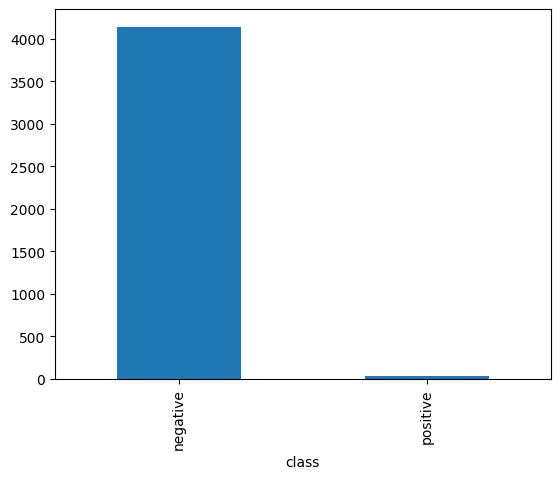

In [16]:
#visualize the difference
df["class"].value_counts().plot(kind="bar")

#### Getting Statistical Measure of the Numeric Data

Based on MAX values see that all numeric values are roughly the same order of magnitude, so will not
have to perform any scaling of the data here. 

Values fall between [0,3]

In [17]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
count,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
mean,0.524032,0.407919,0.139524,0.828771,0.359361,0.180607,0.238853
std,0.120033,0.099187,0.041818,0.490065,0.221771,0.109574,0.139143
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.442125,0.186500,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799750,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.501875,0.252875,0.328875
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


## Checking for Outliers

Here, I want to visualize the distributions to identify outliers and better understand each numerical features values in case I need to peform some clipping/filtering of values

**Result**
See a lot of outliers and right and left tailed distributions.

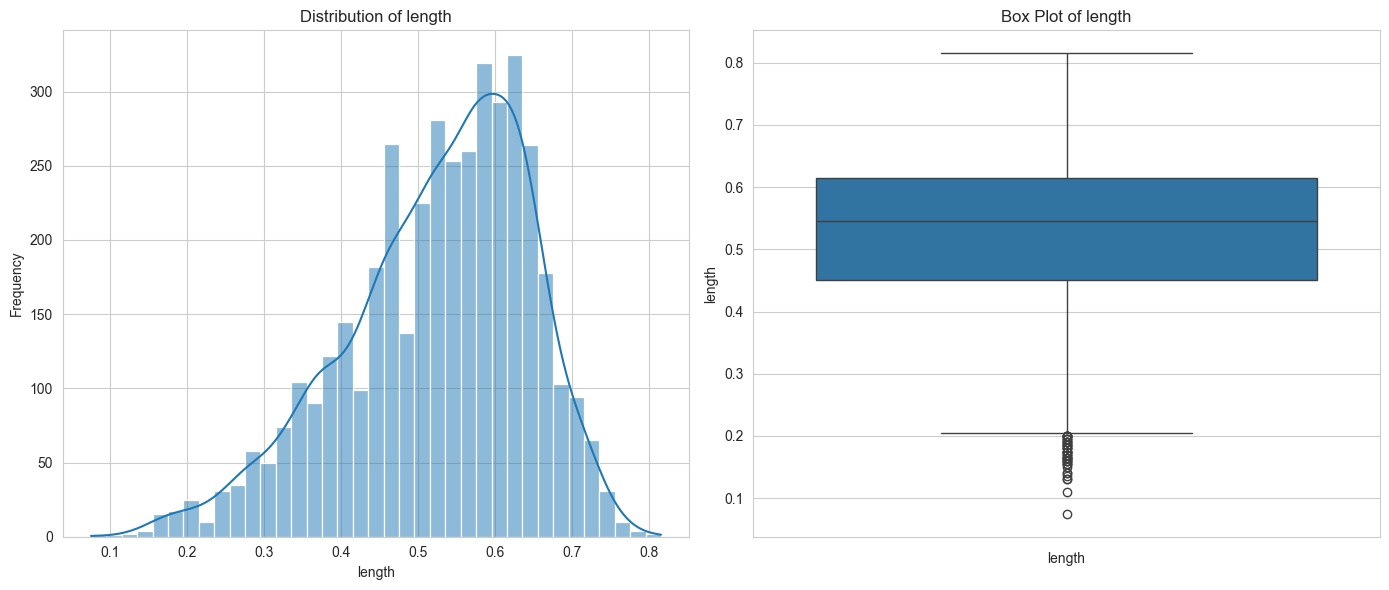

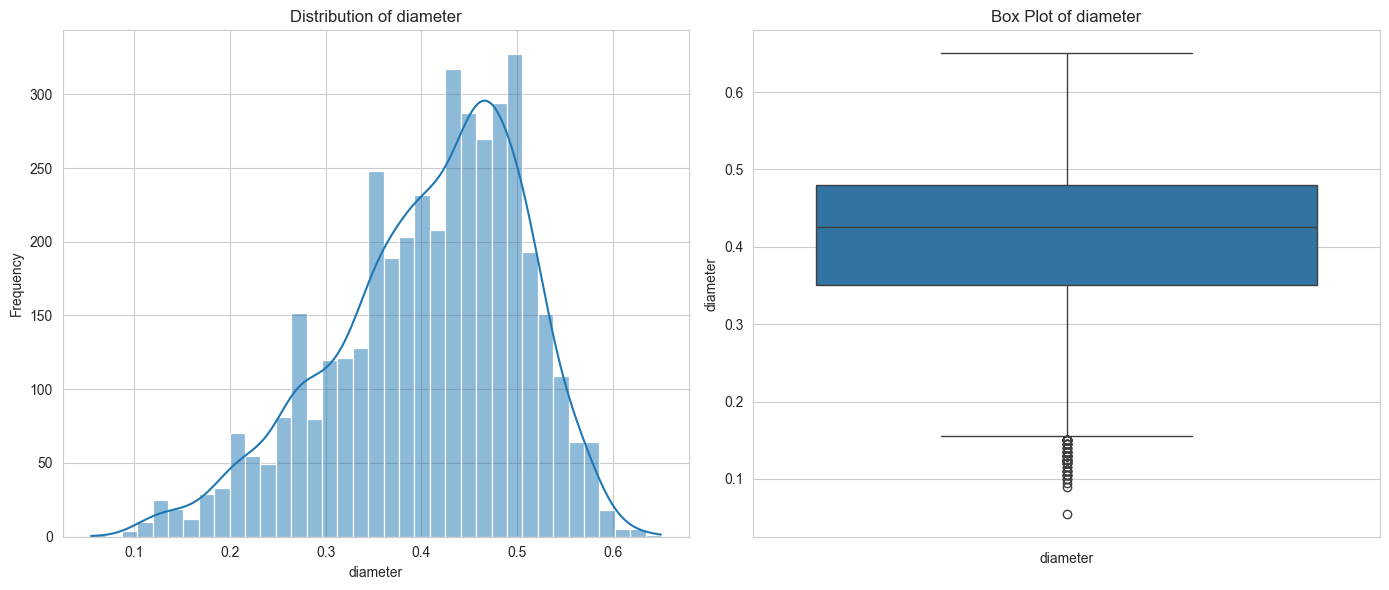

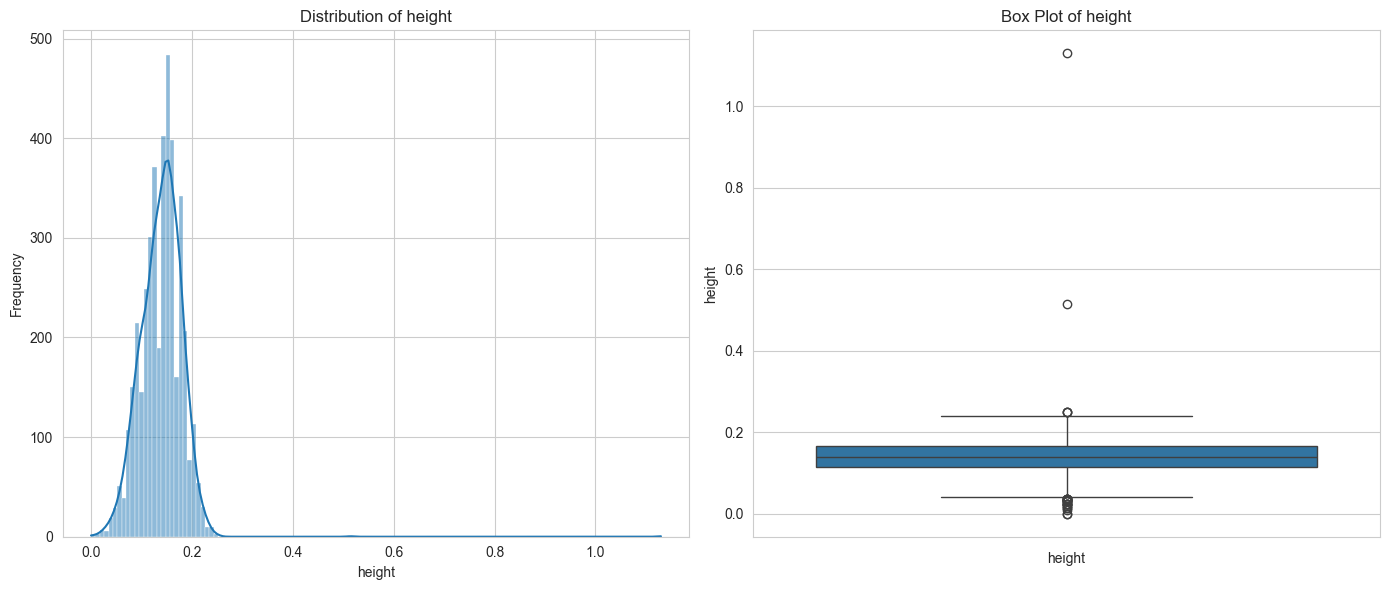

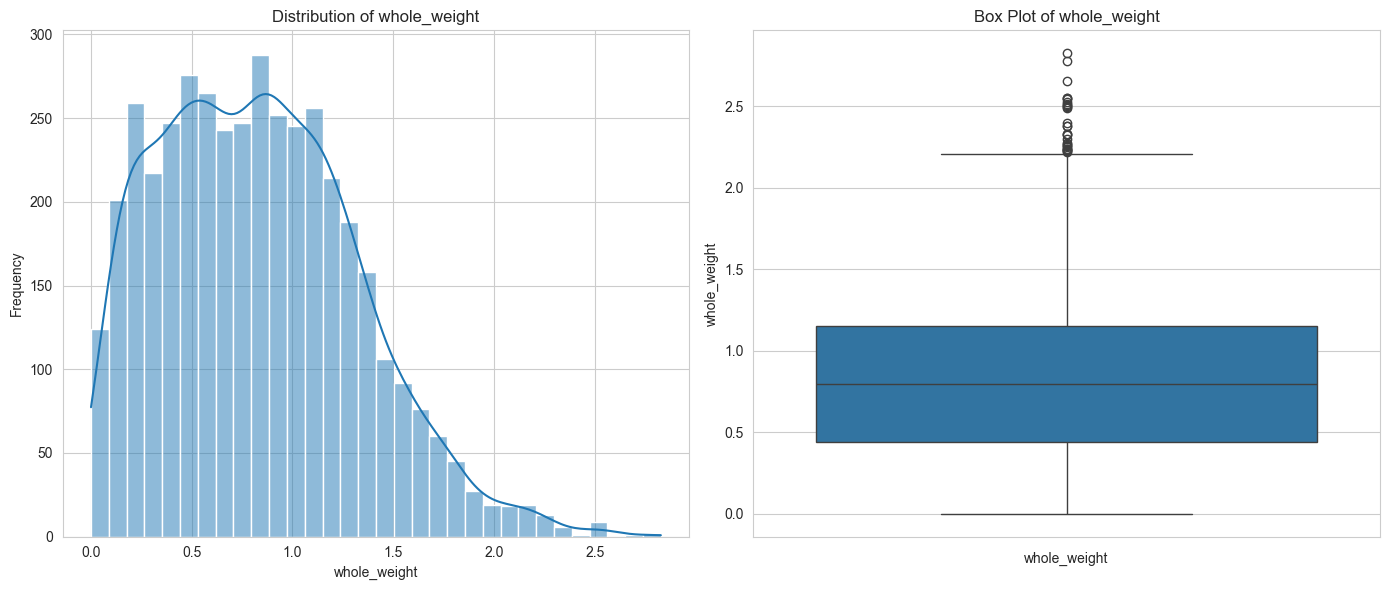

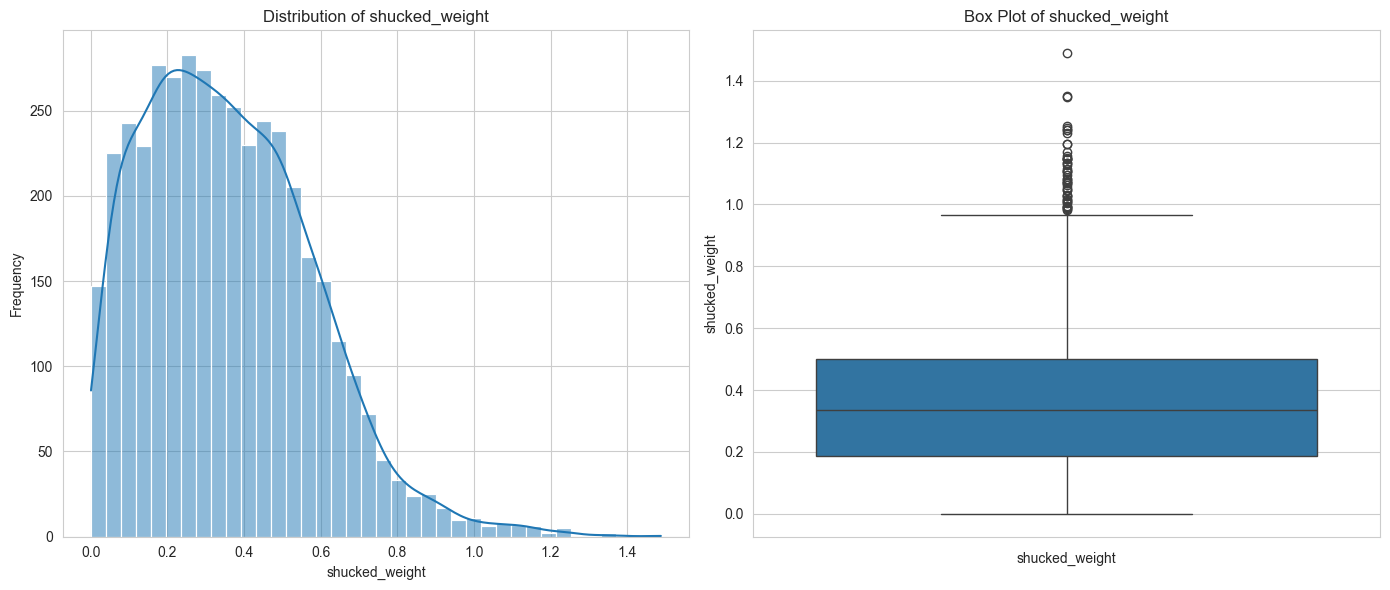

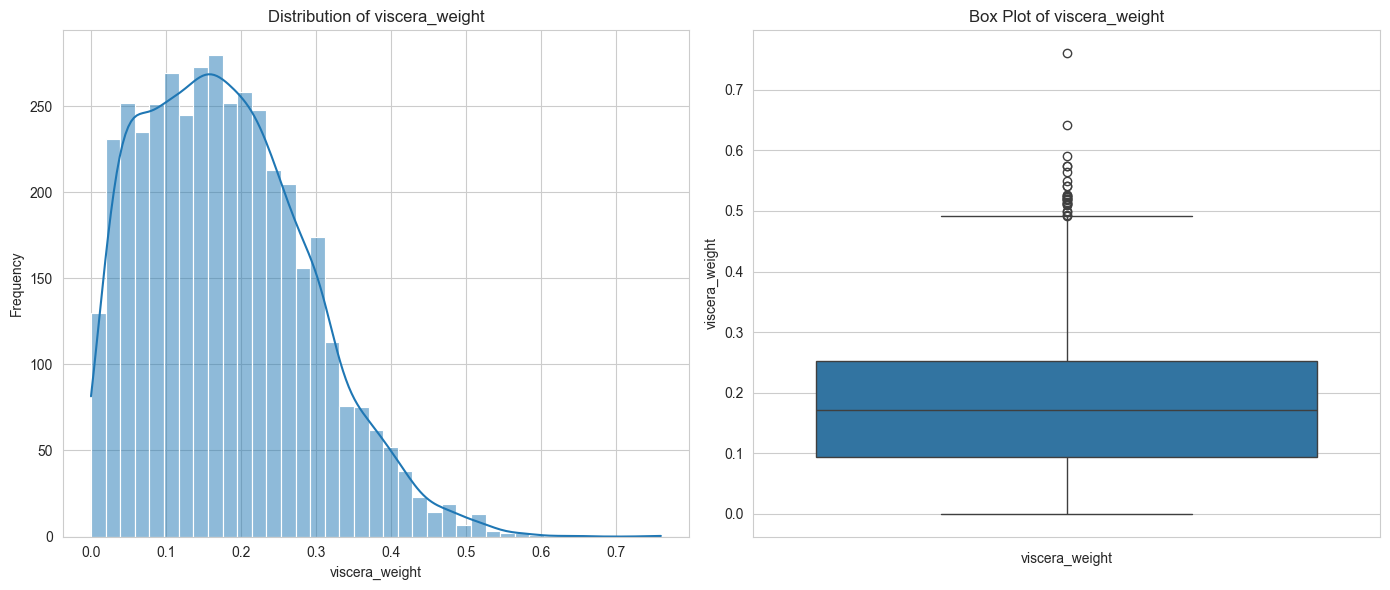

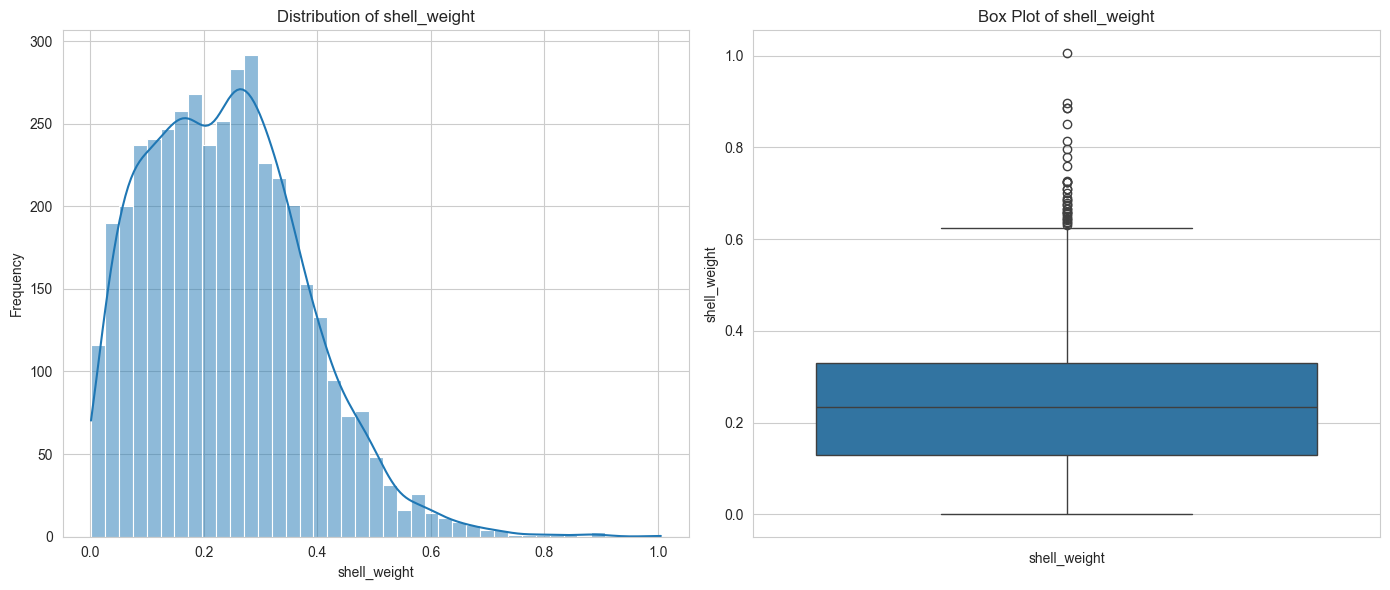

In [18]:
cols_to_viz = numeric_cols

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms and box plots for each feature
for column in cols_to_viz:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

## Creating the Correlation Matrix

Visualize the correlation between numerical features to understand their relationships.

* Very Strong Positive Correlation between every numeric feature and the other numeric features in the data set.


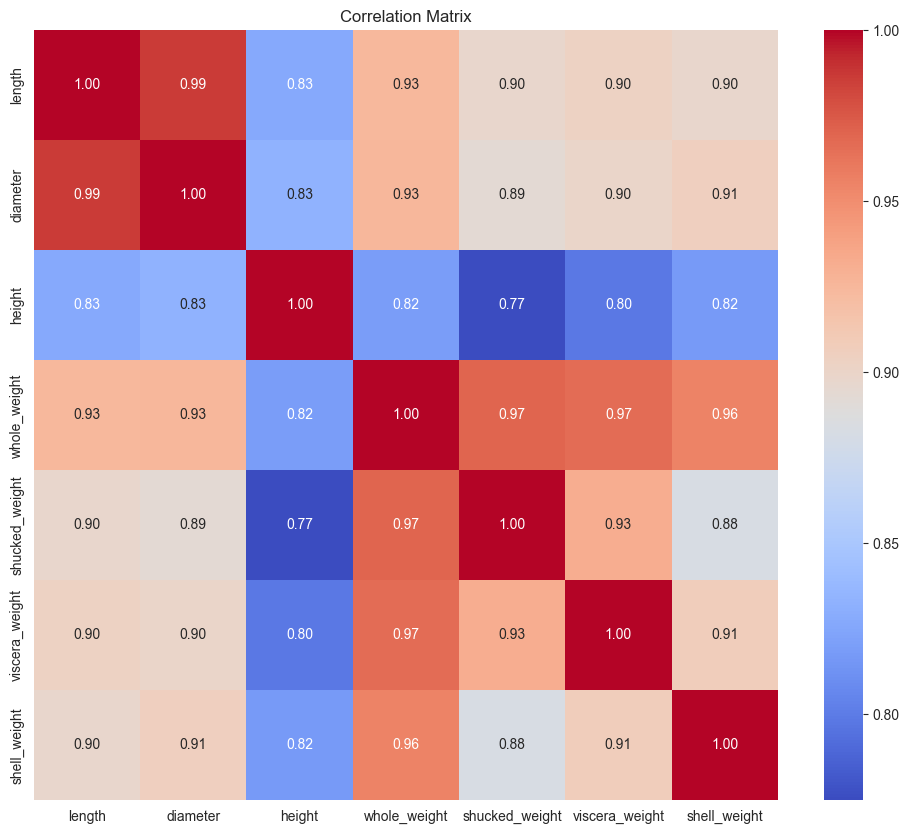

In [19]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

----
# Perform Feature Engineering


### Convert categorical variables to numeric values

In [20]:
# Change Class values to 0-negative, 1-positive
df["class"] = df["class"].map(lambda x: 0 if x == "negative" else 1)

In [21]:
# Use dummy variables to change Sex Infant-I, Female-F, Male-M
df = pd.get_dummies(df, columns=["sex"], drop_first=True)

In [22]:
# show that categories have changes
df.head(2)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,class,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,0,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,0,False,True


---

# Save New Dataframe as CSV 

Storing the new data for logistic model creation


In [23]:
PROCESSED_DATA_PATH = ("/Users/lancehester/Documents/ml_handling_imbalanced_data/data/clean_data.csv")

df.to_csv(PROCESSED_DATA_PATH, index=False)